In [568]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
import math
import warnings
import scipy.stats as stats

from IPython.display import display
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

warnings.filterwarnings(
    action='ignore',
    module='scipy',
    message='^internal gelsd')

In [569]:
#Load data
nycrime = pd.read_csv('newyorkcrime.csv')
nycrime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0,nan,3,4,16,223,53,165,5,nan


In [570]:
nycrime.dtypes

City                                           object
Population                                     object
Violent\r\ncrime                               object
Murder and\r\nnonnegligent\r\nmanslaughter      int64
Rape\r\n(revised\r\ndefinition)1              float64
Rape\r\n(legacy\r\ndefinition)2                object
Robbery                                        object
Aggravated\r\nassault                          object
Property\r\ncrime                              object
Burglary                                       object
Larceny-\r\ntheft                              object
Motor\r\nvehicle\r\ntheft                      object
Arson3                                        float64
dtype: object

In [571]:
#Clean data
#Convert column names to lower case
nycrime.columns = map(str.lower, nycrime.columns)
#Replace column name with first word of name
nycrime.columns = nycrime.columns.str.split().str[0].str.strip()
#fill NaNs with 0
nycrime.fillna(0, inplace=True)
nycrime.head()

,city,population,violent,murder,rape,rape,robbery,aggravated,property,burglary,larceny-,motor,arson3
0,Adams Village,"1,861",0,0,0.000,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,0.000,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,0.000,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8,0.000,30,227,526,"4,090",705,"3,243",142,0.000
4,Albion Village,"6,388",23,0,0.000,3,4,16,223,53,165,5,0.000


In [572]:
#correct the double name in column
nycrime.columns.values[5] = 'rape0'
#the data is very stubborn. trying convert the columns does not work with np because of ',' in the number
#remove the commas and convert data to numeric
cols = nycrime[['population', 'violent', 'robbery','rape','rape0', 'aggravated', 'property', 'burglary', 'larceny-', 'arson3', 'motor']]
for col in cols:    
    nycrime[col] = nycrime[col].astype(str)
    nycrime[col] = nycrime[col].str.replace(',','')
    nycrime[col] = nycrime[col].apply(pd.to_numeric)
nycrime.head()

,city,population,violent,murder,rape,rape0,robbery,aggravated,property,burglary,larceny-,motor,arson3
0,Adams Village,1861,0,0,0.000,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,0.000,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,0.000,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,0.000,30,227,526,4090,705,3243,142,0.000
4,Albion Village,6388,23,0,0.000,3,4,16,223,53,165,5,0.000


In [573]:
#drop rape
nycrime.drop(columns='rape', inplace=True)

In [574]:
nycrime.dtypes

city           object
population      int64
violent         int64
murder          int64
rape0           int64
robbery         int64
aggravated      int64
property        int64
burglary        int64
larceny-        int64
motor           int64
arson3        float64
dtype: object

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


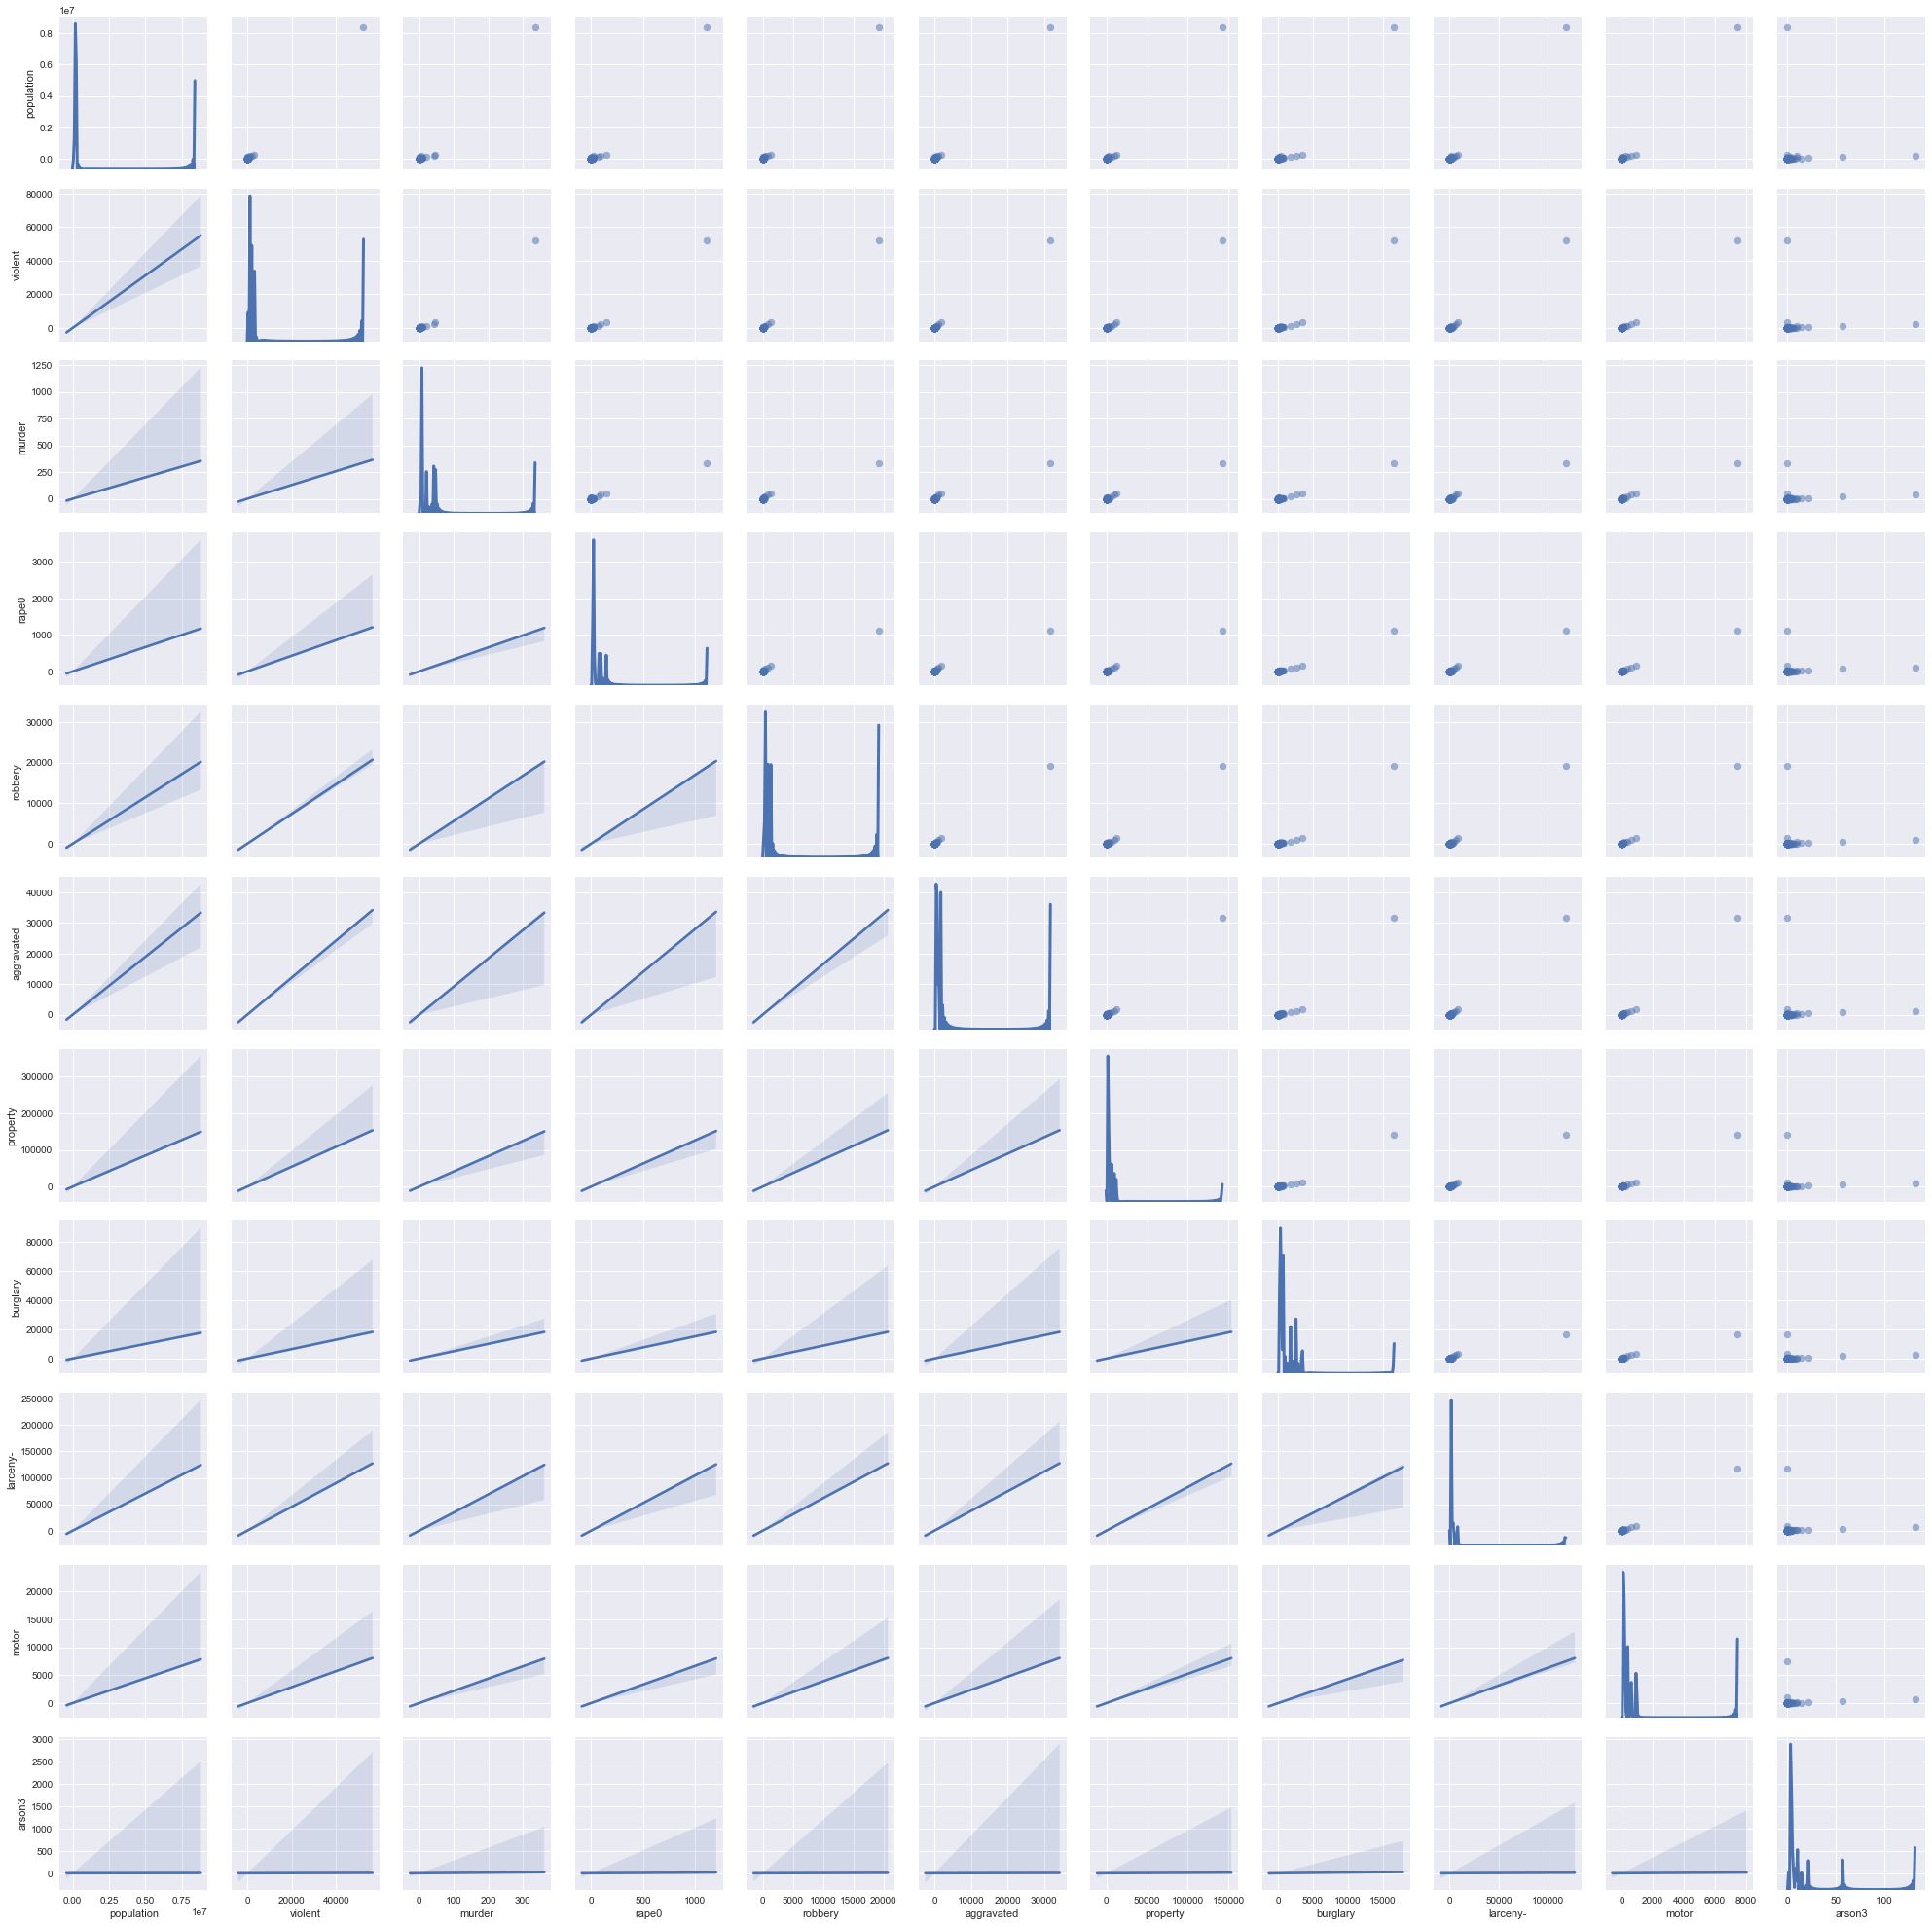

In [575]:
#A quick visuaization,
sns.set_style('darkgrid')
g = sns.PairGrid(nycrime.dropna(), diag_sharey=False)

g.map_upper(plt.scatter, alpha=.5)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=3)
plt.show()

Look at all of the outliers for different variables. Obviously some of these observations should be dropped so our model works better. Look at which city is skewing the data

In [576]:
cols = nycrime[['population', 'violent', 'robbery','rape0', 'aggravated', 'property', 'burglary', 'larceny-', 'arson3', 'motor']]
for col in cols:
    print(col+':')
    print(nycrime.loc[nycrime[col].idxmax()]['city']+'\n')


population:
New York

violent:
New York

robbery:
New York

rape0:
New York

aggravated:
New York

property:
New York

burglary:
New York

larceny-:
New York

arson3:
Rochester

motor:
New York



In [577]:
#drop new york
nycrime.drop(labels=216, inplace=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


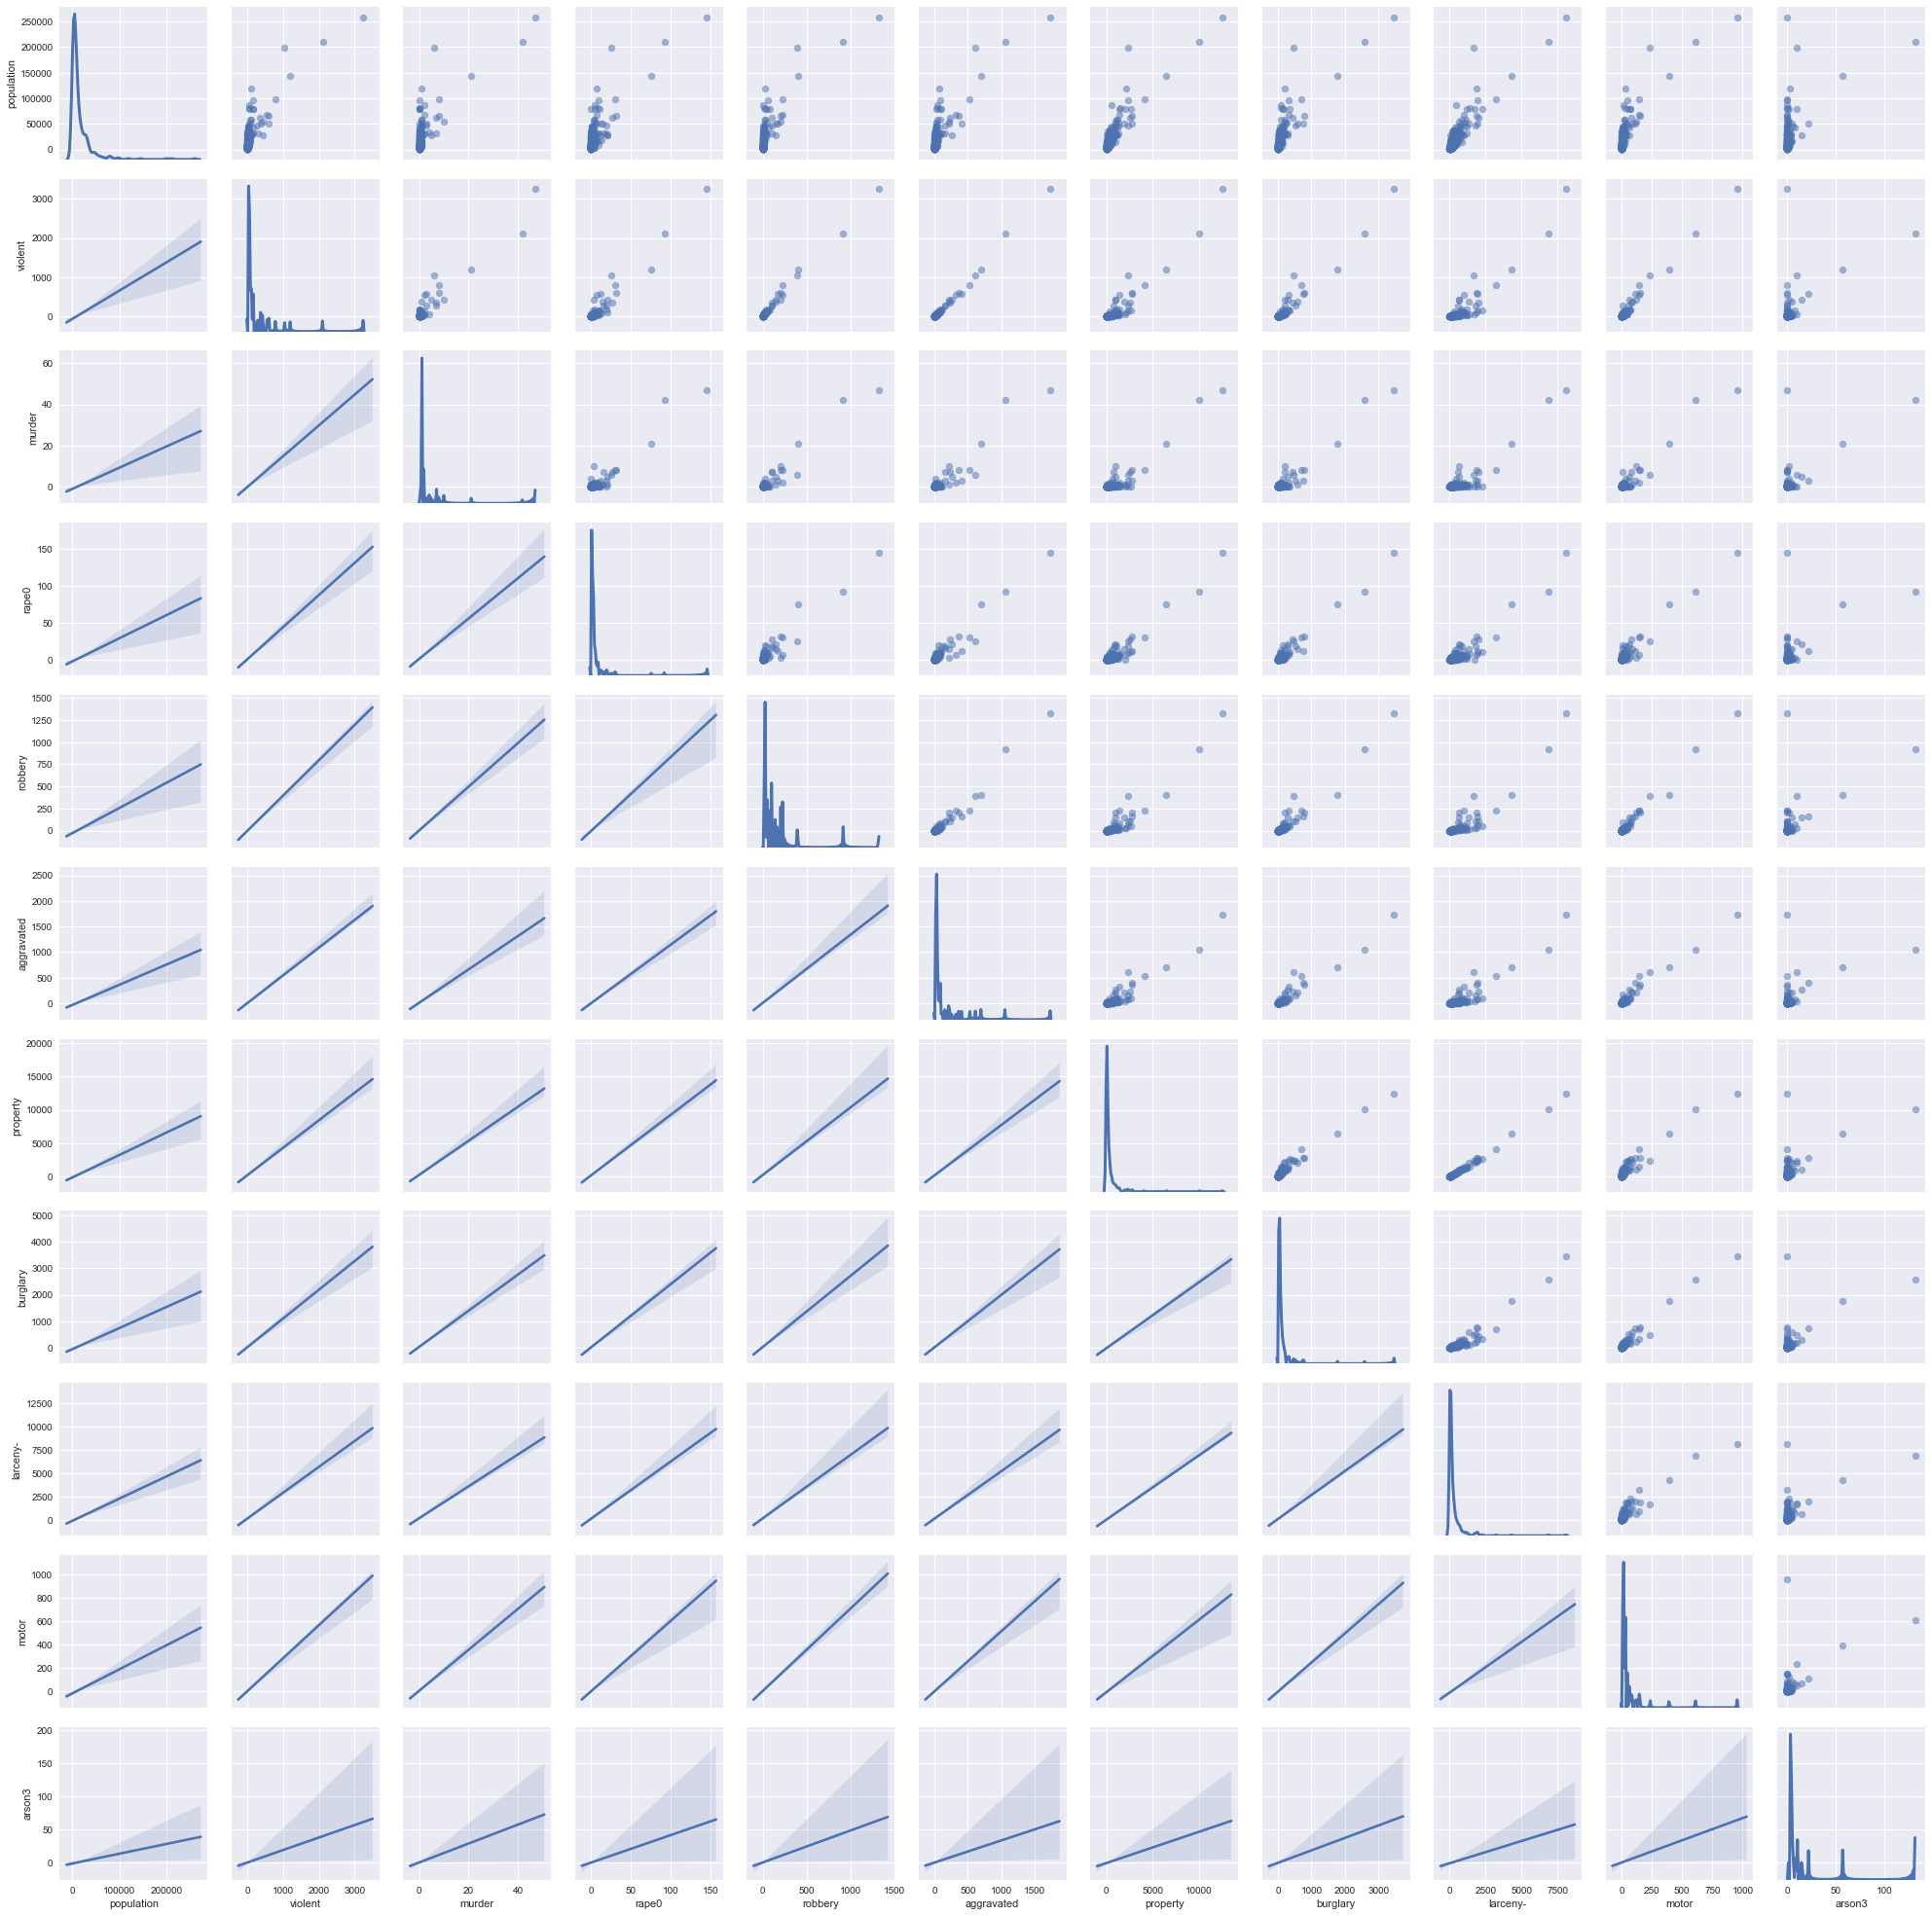

In [578]:
#A quick visuaization,
sns.set_style('darkgrid')
g = sns.PairGrid(nycrime.dropna(), diag_sharey=False)

g.map_upper(plt.scatter, alpha=.5)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=3)
plt.show()

The relationships are a little clearer, but still some outliers should be assessed. There appear to be a few cities with large populations that inconsistent rates of crime in kind.

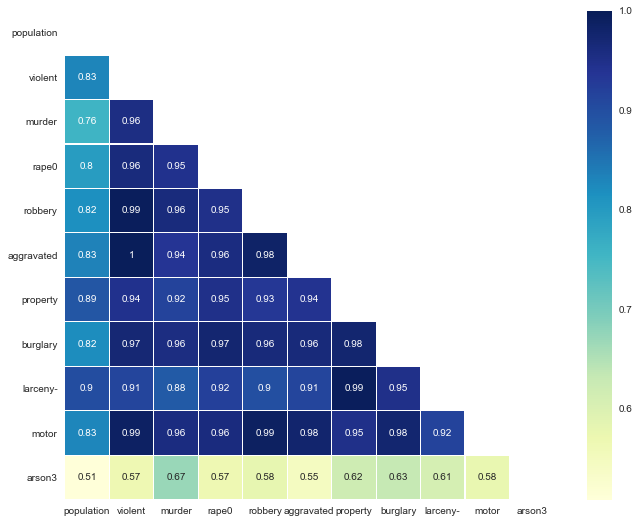

In [579]:
#create heat map to show correlation between variables.
corrmat = nycrime.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
    
with sns.axes_style('white'):    
    ax = plt.subplots(figsize=(12,9))

    sns.heatmap(corrmat,
            vmax=1, 
            cmap="YlGnBu",
            annot=True,
            linewidth=.05,
            square=True,
            mask=mask)


plt.show()

By now I have an idea of what should be done with some of the variables. But first let's try our model that we made in the last lesson to see how it performs.

In [580]:
#create data set to conform to formula
# propertycrime = α+Population+Population**2+Murder+Robbery

nycrime['murder'] = np.where((nycrime['murder']>0), 1, 0)
nycrime['robbery'] = np.where((nycrime['robbery']>0), 1, 0)
nycrime['popsq'] = nycrime['population']**2
model = nycrime[['property','population','popsq','murder','robbery']]
model.head()

,property,population,popsq,murder,robbery
0,12,1861,3463321,0,0
1,24,2577,6640929,0,0
2,16,2846,8099716,0,0
3,4090,97956,9595377936,1,1
4,223,6388,40806544,0,1


In [581]:
#set up and fit the model to the data

regr = linear_model.LinearRegression()
Y = model['property']
X = model[['population','popsq','murder','robbery']]
regr.fit(X, Y)

print('\nCoefficients: \n',regr.coef_)
print('\nIntercept: \n',regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))



Coefficients: 
 [1.29510871e-02 1.14920528e-07 1.95038666e+02 9.28205845e+01]

Intercept: 
 -16.81586632166386

R-squared:
0.8444937611173492


The R squared is 84.44% indicating that the model can explain 84.44% of the variance in the data.

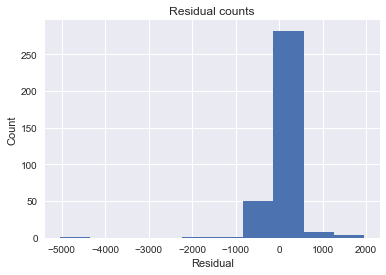

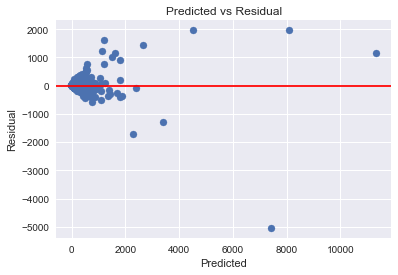

In [582]:
#Examine the error
predicted = regr.predict(X).ravel()
actual = model['property']

#calculate the error, residual
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
#homoskedasticity
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0,color='red')
plt.title('Predicted vs Residual')
plt.show()

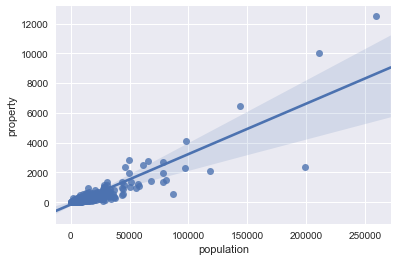

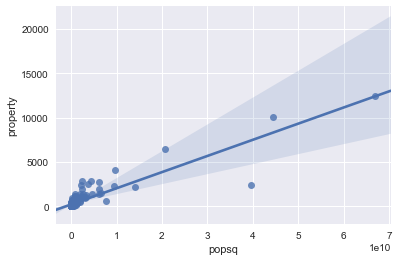

In [583]:
#explore relationship with outcome variable.

for col in model.loc[:,'population':'popsq']:
    g = plt.figure()
    g = sns.regplot(x=col, y='property',data=model, lowess=False)

In [584]:
#Build a regression model

Based on the exploration of the data above, create a new model.
    Select variables will be combined variables such as:
1. violent
2. aggravated
3. burglary

others will be converted to binary
1. rape0
2. arson
3. motor

larceny stays as is

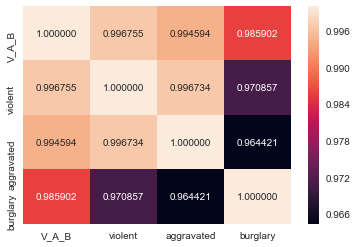

In [585]:
means = nycrime[['violent','aggravated','burglary']].mean(axis=0)
stds = nycrime[['violent','aggravated','burglary']].std(axis=0)

nycrime['V_A_B'] = ((nycrime[['violent','aggravated','burglary']] - means)/ stds).mean(axis=1)
plot = nycrime[['V_A_B','violent','aggravated','burglary']]
#corrmat = plot.corr()
sns.heatmap(plot.corr(), annot=True, fmt='f')
plt.show()
#print(corrmat)

It appears that V_A_B can can explain most of the variance between the selected variables. 

In [586]:
#Select variables for new model (based on observed relationships)
nycrime.head()
new_model = nycrime[['property','population','popsq','murder','robbery','larceny-','motor','arson3','V_A_B']]

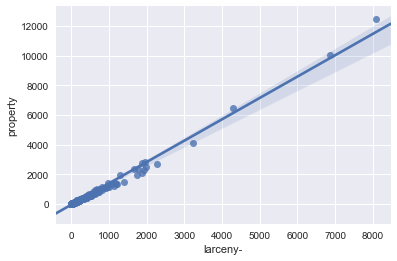

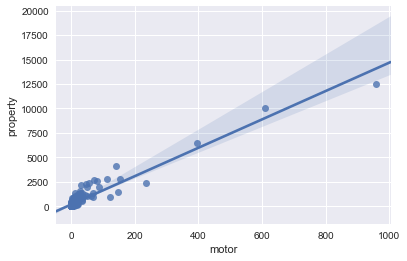

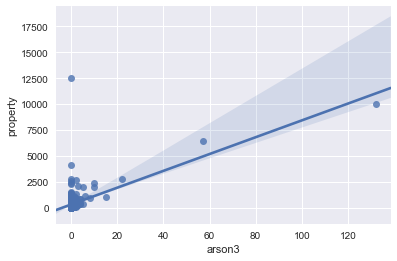

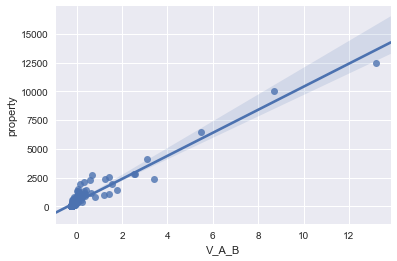

In [587]:
#For the variables not previously discussed, look at relationship with outcome variable.
for col in new_model.loc[:,'larceny-':'V_A_B']:
    g = plt.figure()
    g = sns.regplot(x=col,y='property',data=new_model)
    plt.show()

It is apparent that these outliers could cause a problem for the model. Although, I will change some variables to binary, larceny and VAB will remain continuous.


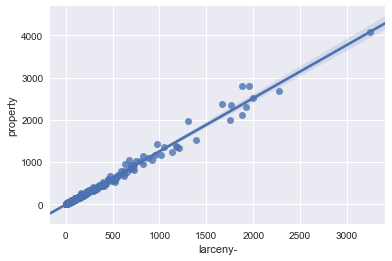

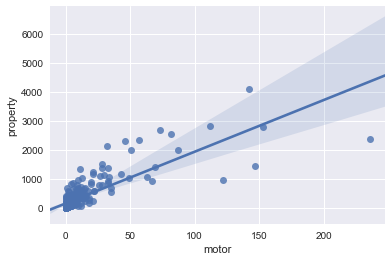

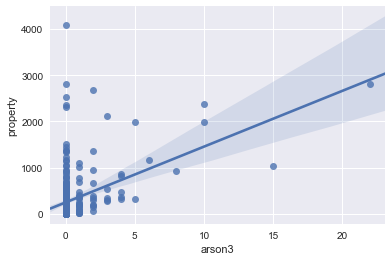

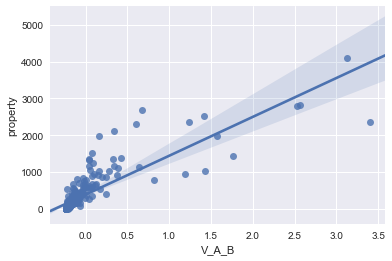

In [588]:
#Select how to deal with outliers
new_model = new_model.loc[new_model['property']<5000]
for col in new_model.loc[:,'larceny-':'V_A_B']:
    g = plt.figure()
    g = sns.regplot(x=col,y='property',data=new_model)
    plt.show()


In [589]:
new_model['arson3'] = np.where((new_model['arson3']>0), 1, 0)
new_model['motor'] = np.where((new_model['motor']>0), 1, 0)
new_model.head()
#this is the new model that will be fit to the data.

,property,population,popsq,murder,robbery,larceny-,motor,arson3,V_A_B
0,12,1861,3463321,0,0,10,0,0,-0.238
1,24,2577,6640929,0,0,20,1,0,-0.225
2,16,2846,8099716,0,0,15,0,0,-0.228
3,4090,97956,9595377936,1,1,3243,1,0,3.122
4,223,6388,40806544,0,1,165,1,0,-0.100


In [590]:

#fit model with this data
regr1 = linear_model.LinearRegression()
B = new_model['property']
A = new_model[['population', 'popsq','murder', 'robbery', 'larceny-', 'motor','arson3','V_A_B']]
regr1.fit(A, B)

print('\nCoefficients: \n',regr1.coef_)
print('\nIntercept: \n',regr1.intercept_)
print('\nR-squared:')
print(regr1.score(A, B))


Coefficients: 
 [ 6.73918128e-04 -1.04693536e-08 -3.26165596e+00 -1.95024814e+00
  1.08451689e+00  1.17369461e+00  6.22134616e+00  2.30421639e+02]

Intercept: 
 53.17357162691698

R-squared:
0.9979616905597966


The Rsquared is 99.79%. This high of an R squared is suspicious.

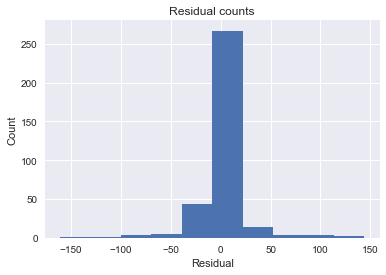

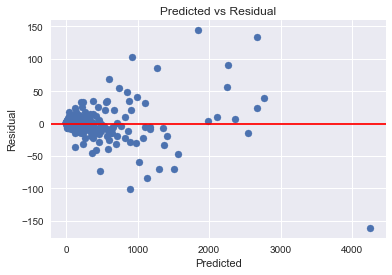

In [591]:
predicted = regr1.predict(A).ravel()
actual = new_model['property']
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
#homoskedasticity
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0,color='red')
plt.title('Predicted vs Residual')
plt.show()

In [592]:
#Interesting to see an R2 so high. This is due to the variable 'larceny-', with out it the model can only scores
#as high as 87.
# Alone, its R squared is 98.7%
regr2 = linear_model.LinearRegression()
D = new_model['property']
C = new_model[['population', 'popsq','murder', 'robbery', 'motor','arson3','V_A_B']]
regr2.fit(C, D)

print('\nCoefficients: \n',regr2.coef_)
print('\nIntercept: \n',regr2.intercept_)
print('\nR-squared:')
print(regr2.score(C,D))
print('\n\n')


Coefficients: 
 [ 2.07074035e-02 -9.56906237e-08 -5.92743564e+01  2.82309722e+01
 -1.92214187e+01  2.19009583e+01  7.23323105e+02]

Intercept: 
 126.01307362232083

R-squared:
0.8720191401611653





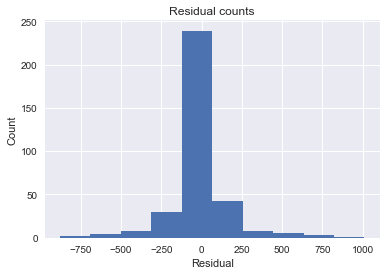

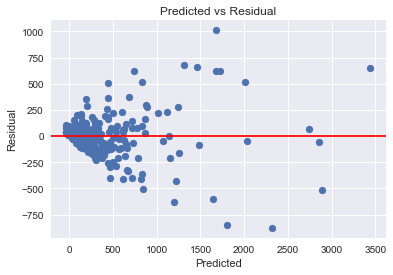

In [593]:
#Examine the errors for the first new_model
predicted = regr2.predict(C).ravel()
actual = new_model['property']

#calculate the error, residual
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
#homoskedasticity
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0,color='red')
plt.title('Predicted vs Residual')
plt.show()



Coefficients: 
 [1.25985898]

Intercept: 
 -4.781397116228902

R-squared:
0.9874388200671761


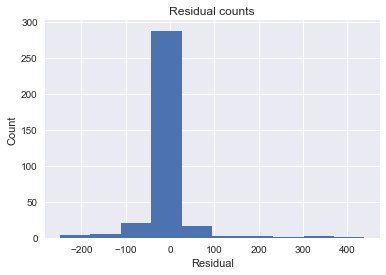

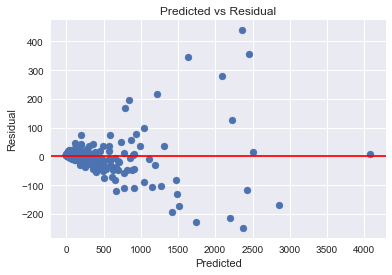

In [594]:
# Alone, its R squared is 98.7%
regr3 = linear_model.LinearRegression()
F = new_model['property']
E = new_model[['larceny-']]
regr3.fit(E, F)

print('\nCoefficients: \n',regr3.coef_)
print('\nIntercept: \n',regr3.intercept_)
print('\nR-squared:')
print(regr3.score(E,F))

predicted = regr3.predict(E).ravel()
actual = new_model['property']

#calculate the error, residual
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
#homoskedasticity
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0,color='red')
plt.title('Predicted vs Residual')
plt.show()